In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.datasets import load_iris
from tensorflow.keras.callbacks import TensorBoard

## Charger le dataset IRIS

In [2]:
df = load_iris()
df = pd.DataFrame(data= np.c_[df['data'], df['target']], columns= df['feature_names'] + ['target'])
# virer les target 2
df = df[df.target != 2]
x = df.drop('target', axis=1)
y = df['target']

# Normalisation des donnée

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split des données

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Créer un modèle de classification

In [5]:
model = Sequential([
	InputLayer(input_shape=(4,)),
	Dense(25, activation='relu'),
	Dense(25, activation='relu'),
	Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7805 - loss: 0.6246 - val_accuracy: 0.8500 - val_loss: 0.5741
Epoch 2/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8609 - loss: 0.5916 - val_accuracy: 0.9000 - val_loss: 0.5472
Epoch 3/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8938 - loss: 0.5765 - val_accuracy: 1.0000 - val_loss: 0.5212
Epoch 4/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9477 - loss: 0.5443 - val_accuracy: 1.0000 - val_loss: 0.4958
Epoch 5/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9477 - loss: 0.5223 - val_accuracy: 1.0000 - val_loss: 0.4716
Epoch 6/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9641 - loss: 0.4955 - val_accuracy: 1.0000 - val_loss: 0.4479
Epoch 7/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.4683 - val_accuracy: 1.0000 - val_loss: 0.4246


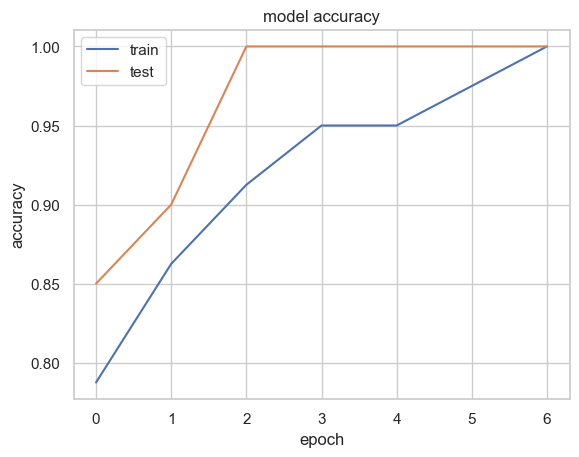

In [7]:
sns.set(style='whitegrid')
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()